# Jamar Sanders
# DSC_520_REGRESSION_ANALYSIS_ANCOVA_2025
# Professor Bauder
# TOPIC 2
# PROJECT 4

# Problem Statement: 

# The problem statement is that the three groups, Bipolar, Control, and UD are all compared so I need to run a test to determine how much variance is in the data and if the Project_answers are going to show normality in the dataset. 

# Null Hypothesis

# The Project_answers will skew toward the left of the dataset. The null hypothesis will be accepted.

# The students will have lower test scores than predicted initially. 

# Step 1: Import necessary libraries

# Import all information for codes from the library and use the store to search for and download all the information (modules needed) out the library and the extension. I use libraries for data visualization, data cleaning, data manipulation and for generating statistical summaries of my ANCOVA Analysis. You see Python pandas, statsmodels, seaborn, matplotlib, scipy.stats for code testing and analysis.

In [1]:
# Step 1: Import necessary libraries
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Step 2: Load the dataset

# Load the dataset from my file path that is already in the codespace. The file is named (DATABASE MINIPONS.xlsx) and I load it into my coding environment using the pd.read_excel function. The read Excel function is necessary because I use an Excel file and a csv import or pdf import would not work. The dataset is loaded but not printed. 

In [2]:
# Step 2: Load the dataset
file_path = '/workspaces/VERIFYING_ASSUMPTIONS/Database MiniPONS.xlsx'
df = pd.read_excel(file_path, sheet_name='Database MiniPONS')

# Step 3: Convert 'Group' to a categorical variable

# Convert column "Group" in the coding environment to a categorical variable (nominal nomenclature). The conversion of the data ensures that the coding environment runs the code while using factorization and not continuous data. This converts the data but does not print. 

In [3]:
# Step 3: Convert 'Group' to a categorical variable
df['Group'] = df['Group'].astype('category')

# Step 4: ANCOVA Model (ANOVA + Regression)

# This step fits an ANCOVA model, which is a combination of ANOVA and regression. It evaluates the effect of the 'Group' variable while controlling for the covariate 'Age' and calculates the model's statistical significance.

# Step 4: ANCOVA Model (ANOVA + Regression)

# Create the model for combining ANCOVA with linear regression and prints a statistical summary of the data. 

# The data shows that R-squared is 0.358 This indicates that approximately 35.8% of the variance in the dependent variable ('Right_answers') can be explained by the independent variable ('Age'), Adj. R-squared is 0.351 (The closer it is to R-squared, the better the model is, but it also accounts for overfitting). 

# The F-statistic is 50.72 (in this case, it indicates that 'Age' significantly affects 'Right_answers'), the Prob (F-statistic) is 4.36e-26 (it suggests that the model is statistically significant). 

# Likelihood is -789.55 (in this case, the log-likelihood is negative and not optimal for this analysis). 

# The Akaine information criterion (AIC) is 1587 (this AIC s not optimal for this analysis, but not the worst) and the Byesian information criterion is 1602 (this BIC is not optimal for this analysis, but not the worst). 

# The dependent variable shows Right_answers.

# The number of observations are 277. The degrees of residuals are 273. The degrees of freedom model is 3. 

# The intercept for t is 44.326 (a t-value of 44.326 is very large, suggesting the intercept is statistically significant and not likely due to random chance). P is greater than absolute t for Group [T.UD] is 3.44 (not statistically significant based on the p value of 3.44 which is greater than .05). All the p values of 0 show that the results are statistically significant because they are less than .05. 

# Prob (Omnibus) is .41 (the p-value of 0.41 indicates that the residuals may not be normally distributed). 

# Jarque-Bera(JB) is 6.238 ( (greater than 5.99 at a 5% significance level) indicates that the residuals are not normally distributed. A value of 6.238 suggests significant deviation from normality, reinforcing the results from the Omnibus test).

# This is some of the data shown. 

In [4]:
# Step 4: ANCOVA Model (ANOVA + Regression)
ancova_model = smf.ols('Right_answers ~ Group + Age', data=df).fit()
print(ancova_model.summary())

                            OLS Regression Results                            
Dep. Variable:          Right_answers   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.351
Method:                 Least Squares   F-statistic:                     50.72
Date:                Thu, 27 Feb 2025   Prob (F-statistic):           4.36e-26
Time:                        17:30:07   Log-Likelihood:                -789.55
No. Observations:                 277   AIC:                             1587.
Df Residuals:                     273   BIC:                             1602.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           50.5849      1.141  

# Step 5: ANOVA (without covariate)

# Fit the ANOVA model without an "Age" variable. This checks the main effect of the variable "group" so that age does not become an extraneous variable. It does not alter the data when perfroming the analyis of the linear regressoin or ANOVA. 

# The group means are then compared using a table. The ANOVA results show that sum_sq in the group row is 2281.767036. 

# The degrees of freedom (df) are 2.0 

# F is 59.289319 

# PR (is greater than F) is 4.016744e-22. 

# The residual group shows that sum_sq is 5272.485671

# Degrees of freedom (274.0)

# F is NaN

# PR (is greater than F) is NaN.

# The data shows that the  F-statistic and the p-value have variation in the groups. The effects and variations impact and have a profound meaning in the data. The nomenclature has an imapct on the data as well. The categorization of variables makes the data analysis ANCOVA display results for that. The data does not show results of other variables which is the aim of the analysis being run in this coding environment.

# There are factors that do not explain the dependent variable (Right_answers) in the dataset.

# Observations and Parameters (rank) of the data is shown with 274 degrees of freedom. 

In [5]:
# Step 5: ANOVA (without covariate)
anova_model = smf.ols('Right_answers ~ Group', data=df).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)
print("ANOVA Results:")
print(anova_table)

ANOVA Results:
               sum_sq     df          F        PR(>F)
Group     2281.767036    2.0  59.289319  4.016744e-22
Residual  5272.485671  274.0        NaN           NaN


# Step 6: Linear Regression (Age predicting Right_answers)

# Perform a linear regression with "Age" instead of group so that this variable is teh primary variable and group does not alter data. The individual's contribution of age explains the variance and how spread out the data is. The dependent variable is shown as Right_answers. in the statistical summarization.  

# The OLS Regression Results show R-squared is o.141 (This indicates that approximately 14.1% of the variance in the dependent variable ('Right_answers') can be explained by the independent variable ('Age') ).

# Adj. R-squared is 0.138 (The closer it is to R-squared, the better the model is, but it also accounts for overfitting).

# F-statistic is 45.28 (in this case, it indicates that 'Age' significantly affects 'Right_answers').

# Prob (F-statistic) is 9.90e-11 ( it suggests that the model is statistically significant).

# Log-likelihood is -829.79 (In regression analysis, this value is used for comparing models, with higher values (closer to 0) indicating a better fit,in this case, the log-likelihood is negative and not optimal for this analysis).

#  Akaine information criterion (AIC) is 1664 (this AIC s not optimal for this analysis, but not the worst).

# Bayesian information criterion is 1671 ( alower Bayesian criterion is better but this isn't the worst). 

# The number of observations are 277. The degrees of freedom (df) residuals are 275. The degrees of freedom model is 1. 

# The coefficient intercept is 54.775 (the model predicts that the person would score 54.775 'Right_answers). The t intercept is 46.407 (a t-value of 46.407 is very large, suggesting the intercept is statistically significant and not likely due to random chance). 

# Prob (Omnibus) is 0.011 (the p-value of 0.011 indicates that the residuals may not be normally distributed), Omnibus is is 8.983 (8.983 suggests some departure from normality). 

# Jarque_Bera (JB) is 8.949 (A significant JB value (greater than 5.99 at a 5% significance level) indicates that the residuals are not normally distributed. A value of 8.949 suggests significant deviation from normality, reinforcing the results from the Omnibus test). 

# All data is best explained when tested against other data. 

In [6]:
# Step 6: Linear Regression (Age predicting Right_answers)
lr_model = smf.ols('Right_answers ~ Age', data=df).fit()
print("Linear Regression Model:")
print(lr_model.summary())

Linear Regression Model:
                            OLS Regression Results                            
Dep. Variable:          Right_answers   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.138
Method:                 Least Squares   F-statistic:                     45.28
Date:                Thu, 27 Feb 2025   Prob (F-statistic):           9.90e-11
Time:                        17:30:56   Log-Likelihood:                -829.79
No. Observations:                 277   AIC:                             1664.
Df Residuals:                     275   BIC:                             1671.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     54.7755      

# Step 7: Residual Analysis

# I create two plots: a histogram to inspect the distribution of residuals, and a Q-Q plot to assess if the residuals follow a normal distribution. The histogram shows the data is skewed to the left indicating that there is nonnormalization in the dataset. The Q-Q plot does show a normal distribution. 

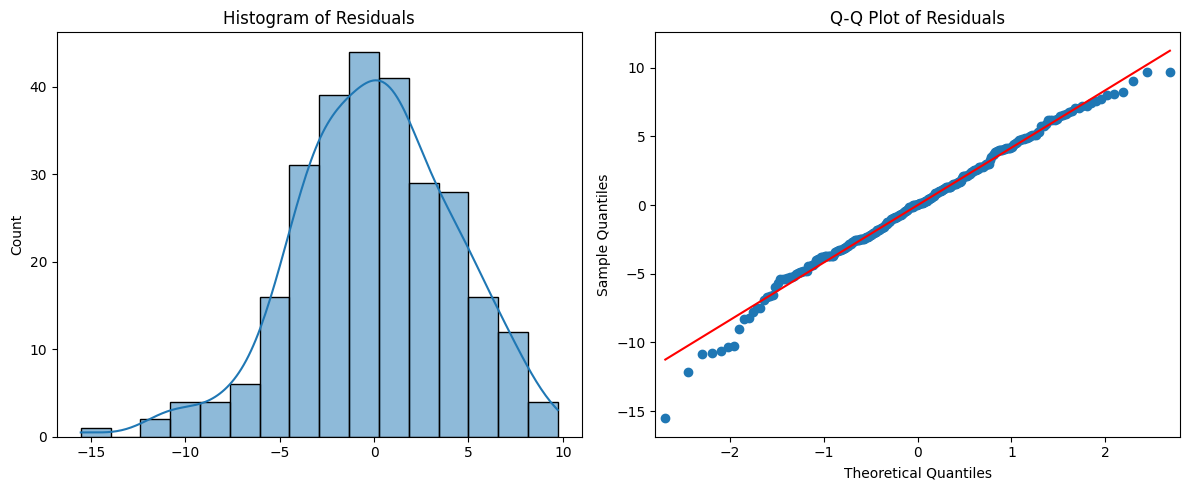

In [8]:
# Step 7: Residual Analysis
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram of residuals
sns.histplot(ancova_model.resid, kde=True, ax=axes[0])
axes[0].set_title("Histogram of Residuals")

# Q-Q Plot
sm.qqplot(ancova_model.resid, line='s', ax=axes[1])
axes[1].set_title("Q-Q Plot of Residuals")

plt.tight_layout()
plt.show()

# The p value of 0.0512592999284412 shows that the information is not statistically significant because it is greater than .05. The Shapiro result, which I learned in a previous class shows the results of my ANCOVA analysis is normalized with skewness which can be addressed using kurtosis.

In [9]:
# Step 8: Shapiro-Wilk Test for normality
shapiro_test = stats.shapiro(ancova_model.resid)
print("Shapiro-Wilk Test:", shapiro_test)

Shapiro-Wilk Test: ShapiroResult(statistic=np.float64(0.9898740859474277), pvalue=np.float64(0.0512592999284412))


# The homogeneity of variance box plot shows that the data is homogenized to a great extent. It is not perfect, but with a few adjustments, the data can become near perfect. The variance (spread of the data) shows that the data is spread out, but the data spread is not accounted for or explained by the factors in the data. The Bipolar group appears to have an outlier below -15.

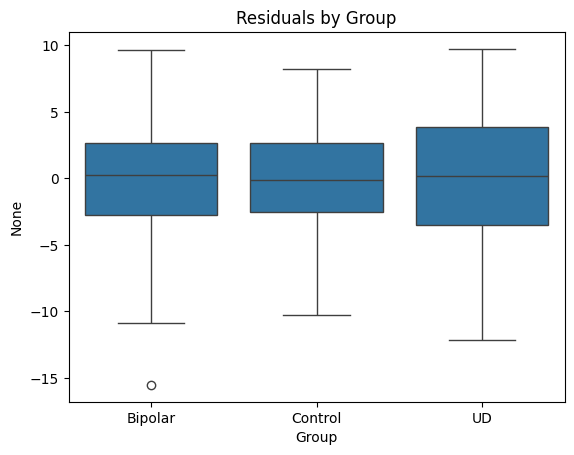

In [10]:
# Step 9: Homogeneity of Variance - Boxplot
sns.boxplot(x='Group', y=ancova_model.resid, data=df)
plt.title("Residuals by Group")
plt.show()